### <img style="float: left; padding-right: 10px; width: 45px" src="https://media-exp1.licdn.com/dms/image/C4E0BAQHCtAMn01UMGQ/company-logo_200_200/0/1621354097823?e=2159024400&v=beta&t=Ck_6OuaeMn7U7rcENlR9TrLRq_Nn8-Y50sKc06he6l4">Cientista de Dados | Pleno/Sênior
#### Desafio Técnico

##### Cenário:

“Você provavelmente já recebeu uma ligação de telemarketing oferecendo um produto que você não precisa. Essa situação de estresse é minimizada quando você oferece um produto que o cliente realmente precisa.”

Obs.: y é a flag de cliente interessado no produto.

**Candidata:** Flávia Monteiro <br>

In [1]:
import pandas as pd
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from xgboost import XGBClassifier
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score, KFold

from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

import six
import sys
sys.modules['sklearn.externals.six'] = six
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
#import mlrose
#from sklearn.externals import six
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

##### Após uma fase exploratória inicial dos dados e entender melhor a problemática, foi possível constatar de fato que o desbalanceamento variável alvo entre suas categorias `[0 e 1]` estava custando o desempenho do modelo em classificar o `cliente interessado` 


In [2]:
dataset_bruto = pd.read_csv("data/train.csv")
dataset_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14123 entries, 0 to 14122
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14123 non-null  int64  
 1   var1    14123 non-null  int64  
 2   var2    14123 non-null  int64  
 3   var3    14123 non-null  int64  
 4   var4    14123 non-null  int64  
 5   var5    14123 non-null  int64  
 6   var6    14123 non-null  int64  
 7   var7    14123 non-null  int64  
 8   var8    14123 non-null  int64  
 9   var9    14123 non-null  int64  
 10  var10   14123 non-null  int64  
 11  var11   14123 non-null  int64  
 12  var12   14123 non-null  int64  
 13  var13   14123 non-null  int64  
 14  var14   14123 non-null  int64  
 15  var15   14123 non-null  int64  
 16  var16   14123 non-null  int64  
 17  var17   14123 non-null  int64  
 18  var18   14123 non-null  int64  
 19  var19   14123 non-null  int64  
 20  var20   14123 non-null  int64  
 21  var21   14123 non-null  int64  
 22

Cenário 1 - Usando todas as colunas
-

In [3]:
y_real = dataset_bruto['y']
X_bruto_sem_norm = dataset_bruto.drop(columns= ['y', 'id'])
X_col_nomes_bruto = X_bruto_sem_norm.columns

In [4]:
scaler = preprocessing.StandardScaler().fit(X_bruto_sem_norm)
X_scaled_n1 = scaler.transform(X_bruto_sem_norm)

scaled_df_n1 = pd.DataFrame(X_scaled_n1, index= X_bruto_sem_norm.index, columns=X_bruto_sem_norm.columns)
scaled_df_n1

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,1.140045,-0.022738,1.134399,1.427147,-1.248792,0.925336,0.413243,-2.318884,0.350973,0.463783,...,0.427019,0.921522,0.157643,-0.313932,-0.626021,-0.252854,2.516368,2.516505,0.207685,0.047562
1,-0.785862,0.393886,0.358950,-0.149608,0.494177,-1.912606,-2.539439,0.418810,0.350973,0.463783,...,0.427547,-1.085417,-6.310142,-0.038823,-0.022451,-0.506560,-0.397376,-0.397376,0.207759,0.046877
2,-1.336121,0.068827,-0.505939,-0.495018,-1.461444,-0.433306,0.358987,-2.318884,0.350973,0.463783,...,0.427452,-1.085417,0.158021,-0.408436,0.861348,-0.548274,-0.397376,-0.397376,0.208940,0.049696
3,1.415175,0.068827,0.148765,-1.249775,0.808350,-0.225873,0.350420,0.399948,0.344555,0.338909,...,0.427825,-1.085417,0.159002,-0.533435,0.736323,-0.272686,2.516689,2.516493,0.207759,0.047410
4,-0.373168,0.091719,0.605806,1.425746,0.146364,-0.835775,0.358987,-2.318884,0.350973,0.463783,...,0.427383,0.920939,0.158185,-0.258716,0.542318,-0.430653,-0.397376,-0.397376,0.209309,0.047410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,-0.785862,0.068827,0.828513,1.359506,-1.331991,0.643525,0.401821,0.437672,0.350973,-2.242666,...,0.427197,-1.085417,0.157170,-0.683966,0.387115,-0.675469,-0.397376,-0.397376,0.209309,0.047715
14119,1.277610,0.480874,-0.420971,-1.618798,0.249987,-1.912606,-2.539439,0.445756,-2.864714,-2.242666,...,-2.339338,-1.085417,0.158634,-0.318506,0.606986,-0.561267,-0.397376,-0.397376,0.207759,0.048782
14120,2.378129,0.091719,0.180069,0.858703,1.052540,-0.572145,0.413243,0.445756,0.350973,0.338909,...,0.427431,-1.085417,0.158038,-0.600233,0.645787,-1.035169,-0.397376,-0.397376,0.209014,0.047944
14121,-0.785862,0.297742,-1.229512,0.441650,-0.573590,0.940211,0.413243,0.445756,0.344555,0.463783,...,0.427413,0.921039,0.159188,0.505879,-0.423394,0.659391,-0.397376,-0.397376,0.208350,0.047334


#### PARA O PROCESSO DE TREINAMENTO, VALIDAÇÃO E TESTE, FOI SEPARADO 10% DAS AMOSTRAS REAIS PARA VALIDAR O MODELO DEPOIS DA APLICAÇÃO DA TÉCNICA DE `SMOTE` PARA TRATAR O DESBALANCEAMENTO DA SAÍDA CATEGÓRICA [0 ou 1].
- Buscamos utilizar a técnica para gerar uma sobreamostragem sintética na classe `1 - interesse do cliente`. 
- Nas próximas celulas você verá o processo de construção do modelo e validação do mesmo.
- Neste ponto não foi objetivo encontrar a melhor técnica com o melhor arranjo de parâmetros, buscou-se comprovar que este é o caminho correto para encontrar um modelo ótimo para a problemática.

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled_n1, y_real, test_size = 0.1)
print('Original dataset shape', Counter(y_real))
print('Train dataset shape', Counter(Y_train))
print('Validation dataset shape', Counter(Y_val))

Original dataset shape Counter({0: 11273, 1: 2850})
Train dataset shape Counter({0: 10155, 1: 2555})
Validation dataset shape Counter({0: 1118, 1: 295})


In [10]:
smote = SMOTE(random_state = 123)
x_smote, y_smote = smote.fit_sample(X_train, Y_train)

print('Train dataset shape', Counter(Y_train))
print('Resample dataset shape', Counter(y_smote))

Train dataset shape Counter({0: 10155, 1: 2555})
Resample dataset shape Counter({0: 10155, 1: 10155})


              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3013
           1       0.93      0.90      0.91      3080

    accuracy                           0.91      6093
   macro avg       0.91      0.91      0.91      6093
weighted avg       0.91      0.91      0.91      6093



<Figure size 432x288 with 0 Axes>

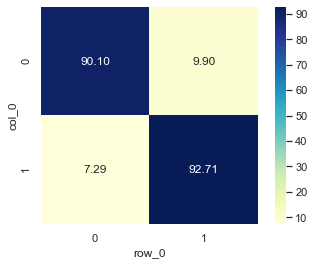

In [11]:
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(x_smote, y_smote, test_size = 0.3)
model = RandomForestClassifier(max_depth = 20, random_state = 123, n_estimators = 50)
model.fit(X_train_smote, Y_train_smote)

y_pred_smote = model.predict(X_test_smote)
print(classification_report(Y_test_smote, y_pred_smote))

contingency_matrix = pd.crosstab( Y_test_smote, y_pred_smote)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

plt.clf()
fig, ax = plt.subplots()
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1118
           1       0.67      0.57      0.62       295

    accuracy                           0.85      1413
   macro avg       0.78      0.75      0.76      1413
weighted avg       0.85      0.85      0.85      1413



<Figure size 432x288 with 0 Axes>

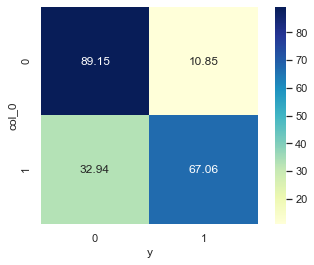

In [12]:
y_pred_val = model.predict(X_val)
print(classification_report(Y_val, y_pred_val))

contingency_matrix = pd.crosstab(Y_val, y_pred_val)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

plt.clf()
fig, ax = plt.subplots()
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

Cenário 2 - Removendo colunas
-

In [13]:
dataset_p1 = dataset_bruto.drop(columns= ["id", "var60", "var65", "var66"])
dataset_p1.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var57,var58,var59,var61,var62,var63,var64,var67,var68,y
count,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,...,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000
mean,9.712667,23.966579,1584.671245,15179.176025,5543.697869,1315.314168,-109.713729,-138.426680,-106.362388,-118.986688,...,-112.092123,-111.022124,-154.157900,-24.210294,0.073086,0.779221,0.028778,-41.252803,-2.154825,0.201798
std,7.269559,218.429664,1118.101765,9994.295223,3329.493664,1210.074896,350.202420,371.128392,311.608454,392.409936,...,315.799354,314.158769,361.158606,154.485314,0.053963,0.234068,0.018681,199.275514,48.244171,0.401357
min,0.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,0.004267,-999.000000,-999.000000,0.000000
25%,4.000000,38.000000,731.000000,6493.500000,2374.000000,482.000000,16.000000,10.000000,1.000000,14.000000,...,0.031183,0.017456,0.097918,0.169428,0.040391,0.706357,0.018357,0.117647,0.136029,0.000000
50%,5.000000,53.000000,1461.000000,15309.000000,6159.000000,1558.000000,33.000000,24.000000,3.000000,63.000000,...,0.101075,0.048370,0.179503,0.239625,0.060265,0.877901,0.023480,0.176471,0.176471,0.000000
75%,18.000000,110.000000,2481.000000,23818.000000,8594.000000,2438.000000,35.000000,27.000000,3.000000,63.000000,...,0.451613,0.141959,0.257848,0.341919,0.088831,0.930373,0.034581,0.264706,0.220588,0.000000
max,30.000000,129.000000,3546.000000,32403.000000,11373.000000,3001.000000,36.000000,28.000000,3.000000,85.000000,...,1.000000,1.000000,0.913773,0.934994,0.814846,1.000000,0.387386,0.911765,1.000000,1.000000


In [14]:
y_real = dataset_p1['y']
X_p1_sem_norm = dataset_p1.drop(columns= ['y'])
X_col_nomes_bruto = X_p1_sem_norm.columns

In [15]:
scaler = preprocessing.StandardScaler().fit(X_p1_sem_norm)
X_scaled_n2 = scaler.transform(X_p1_sem_norm)

scaled_df_n2 = pd.DataFrame(X_scaled_n2, index= X_p1_sem_norm.index, columns=X_p1_sem_norm.columns)
scaled_df_n2

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var56,var57,var58,var59,var61,var62,var63,var64,var67,var68
0,1.140045,-0.022738,1.134399,1.427147,-1.248792,0.925336,0.413243,-2.318884,0.350973,0.463783,...,0.354684,0.357599,0.353528,0.427019,0.157643,-0.313932,-0.626021,-0.252854,0.207685,0.047562
1,-0.785862,0.393886,0.358950,-0.149608,0.494177,-1.912606,-2.539439,0.418810,0.350973,0.463783,...,0.355226,0.355927,0.353628,0.427547,-6.310142,-0.038823,-0.022451,-0.506560,0.207759,0.046877
2,-1.336121,0.068827,-0.505939,-0.495018,-1.461444,-0.433306,0.358987,-2.318884,0.350973,0.463783,...,0.354925,0.356390,0.353467,0.427452,0.158021,-0.408436,0.861348,-0.548274,0.208940,0.049696
3,1.415175,0.068827,0.148765,-1.249775,0.808350,-0.225873,0.350420,0.399948,0.344555,0.338909,...,0.356518,0.355280,0.354059,0.427825,0.159002,-0.533435,0.736323,-0.272686,0.207759,0.047410
4,-0.373168,0.091719,0.605806,1.425746,0.146364,-0.835775,0.358987,-2.318884,0.350973,0.463783,...,0.356138,0.355280,0.353854,0.427383,0.158185,-0.258716,0.542318,-0.430653,0.209309,0.047410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,-0.785862,0.068827,0.828513,1.359506,-1.331991,0.643525,0.401821,0.437672,0.350973,-2.242666,...,0.354402,0.358058,0.353609,0.427197,0.157170,-0.683966,0.387115,-0.675469,0.209309,0.047715
14119,1.277610,0.480874,-0.420971,-1.618798,0.249987,-1.912606,-2.539439,0.445756,-2.864714,-2.242666,...,-2.810547,-2.808553,-2.826626,-2.339338,0.158634,-0.318506,0.606986,-0.561267,0.207759,0.048782
14120,2.378129,0.091719,0.180069,0.858703,1.052540,-0.572145,0.413243,0.445756,0.350973,0.338909,...,0.354342,0.358127,0.353517,0.427431,0.158038,-0.600233,0.645787,-1.035169,0.209014,0.047944
14121,-0.785862,0.297742,-1.229512,0.441650,-0.573590,0.940211,0.413243,0.445756,0.344555,0.463783,...,0.354738,0.357599,0.353479,0.427413,0.159188,0.505879,-0.423394,0.659391,0.208350,0.047334


In [16]:
# SEPARANDO 10% DAS AMOSTRAS REAIS PARA VALIDAR O MODELO DEPOIS DA APLICAÇÃO DA TÉCNICA
# DE SMOTE PARA TRATAR O DESBALANCEAMENTO DA SAÍDA CATEGÓRICA (0 ou 1)
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled_n2, y_real, test_size = 0.1)
print('Original dataset shape', Counter(y_real))
print('Train dataset shape', Counter(Y_train))
print('Validation dataset shape', Counter(Y_val))

Original dataset shape Counter({0: 11273, 1: 2850})
Train dataset shape Counter({0: 10137, 1: 2573})
Validation dataset shape Counter({0: 1136, 1: 277})


In [17]:
smote = SMOTE(random_state = 123)
x_smote, y_smote = smote.fit_sample(X_train, Y_train)

print('Train dataset shape', Counter(Y_train))
print('Resample dataset shape', Counter(y_smote))

Train dataset shape Counter({0: 10137, 1: 2573})
Resample dataset shape Counter({1: 10137, 0: 10137})


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3095
           1       0.92      0.90      0.91      2995

    accuracy                           0.91      6090
   macro avg       0.91      0.91      0.91      6090
weighted avg       0.91      0.91      0.91      6090



<Figure size 432x288 with 0 Axes>

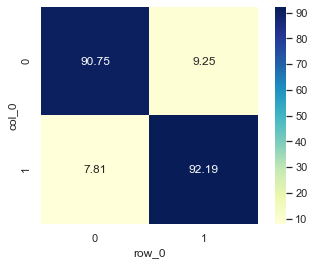

In [32]:
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(x_smote, y_smote, test_size = 0.3)
model = RandomForestClassifier(max_depth = 20, random_state = 123, n_estimators = 300)
model.fit(X_train_smote, Y_train_smote)

y_pred_smote = model.predict(X_test_smote)
print(classification_report(Y_test_smote, y_pred_smote))

contingency_matrix = pd.crosstab( Y_test_smote, y_pred_smote)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

plt.clf()
fig, ax = plt.subplots()
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

C:\Users\UFOPA\.conda\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3097
           1       0.94      0.89      0.91      2986

    accuracy                           0.92      6083
   macro avg       0.92      0.92      0.92      6083
weighted avg       0.92      0.92      0.92      6083



<Figure size 432x288 with 0 Axes>

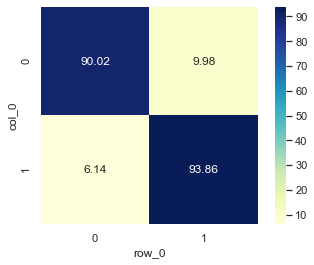

In [29]:
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(x_smote, y_smote, test_size = 0.3)
model = XGBClassifier(random_state = 123, n_estimators = 300)
model.fit(X_train_smote, Y_train_smote)

y_pred_smote = model.predict(X_test_smote)
print(classification_report(Y_test_smote, y_pred_smote))

contingency_matrix = pd.crosstab( Y_test_smote, y_pred_smote)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

plt.clf()
fig, ax = plt.subplots()
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1136
           1       0.74      0.56      0.64       277

    accuracy                           0.88      1413
   macro avg       0.82      0.75      0.78      1413
weighted avg       0.87      0.88      0.87      1413



<Figure size 432x288 with 0 Axes>

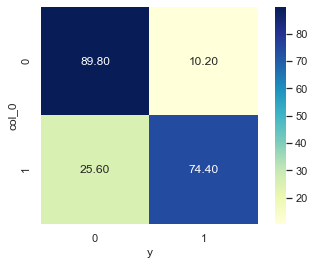

In [30]:
y_pred_val = model.predict(X_val)
print(classification_report(Y_val, y_pred_val))

contingency_matrix = pd.crosstab(Y_val, y_pred_val)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

plt.clf()
fig, ax = plt.subplots()
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

PCA
-

In [34]:
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled_n1, y_real, test_size = 0.1)
print('Original dataset shape', Counter(y_real))
print('Train dataset shape', Counter(Y_train))
print('Validation dataset shape', Counter(Y_val))

smote = SMOTE(random_state = 123)
x_smote, y_smote = smote.fit_sample(X_train, Y_train)

print('Train dataset shape', Counter(Y_train))
print('Resample dataset shape', Counter(y_smote))

X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(x_smote, y_smote, test_size = 0.3)
n_comp = 3
all_componentes = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']
pca = PCA(n_components=n_comp)

principalComponents = pca.fit_transform(X_train_smote)

Y_pc = pd.DataFrame(data=Y_train_smote, columns=['y'])
X_pc = pd.DataFrame(data=principalComponents, columns=all_componentes[:n_comp])
X_pc
len(X_pc), len(X_train_smote), len(Y_train_smote)

Original dataset shape Counter({0: 11273, 1: 2850})
Train dataset shape Counter({0: 10156, 1: 2554})
Validation dataset shape Counter({0: 1117, 1: 296})
Train dataset shape Counter({0: 10156, 1: 2554})
Resample dataset shape Counter({0: 10156, 1: 10156})


(14218, 14218, 14218)

In [35]:
Y_pc.index

RangeIndex(start=0, stop=14218, step=1)

In [36]:
dataset_pc = pd.concat([X_pc, Y_pc], axis=1)
dataset_pc

,principal component 1,principal component 2,principal component 3,y
0,-1.227234,-0.662041,-0.743455,1
1,-1.044855,-0.824818,-0.889080,0
2,-1.014845,1.856298,3.634182,1
3,-1.402180,5.204546,0.127870,1
4,-1.430612,-0.889376,-1.039296,1
...,...,...,...,...
14213,-3.000034,12.119648,5.778374,0
14214,-1.457450,-0.228661,-2.273387,0
14215,-1.273577,-0.679728,-1.412034,1
14216,-0.862676,-1.114100,-0.382507,1


<Figure size 432x432 with 0 Axes>

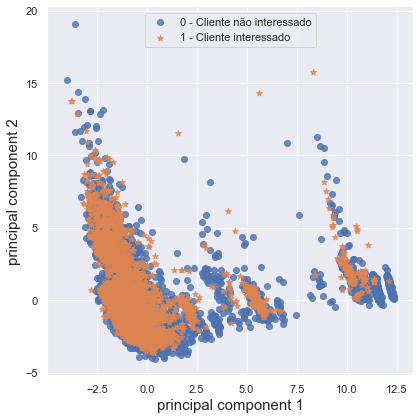

<Figure size 432x432 with 0 Axes>

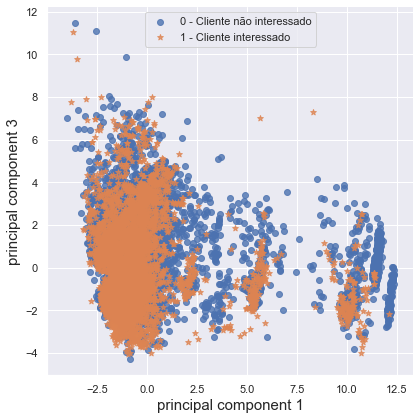

<Figure size 432x432 with 0 Axes>

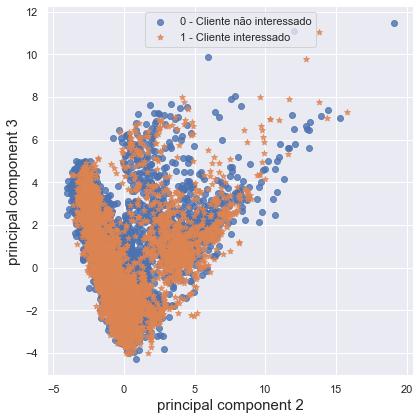

In [37]:
fig_size = (6, 6)
class_names = ['0 - Cliente não interessado','1 - Cliente interessado']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
markers = ['o', '*']

for col1 in all_componentes[:n_comp-1]:
    for col2 in all_componentes[1:n_comp]:
        if(col1 != col2):   
        
            plt.figure(figsize = fig_size)
            sns.lmplot(x=col1,
                           y=col2,
                           data=dataset_pc,
                      fit_reg=False,
                      hue="y", markers=markers, legend=False, legend_out=False, height=fig_size[1], aspect=fig_size[0]/fig_size[1])

            plt.legend(class_names, loc=9)
            plt.xlabel(col1, fontsize=15)
            plt.ylabel(col2, fontsize=15)
            plt.tight_layout()

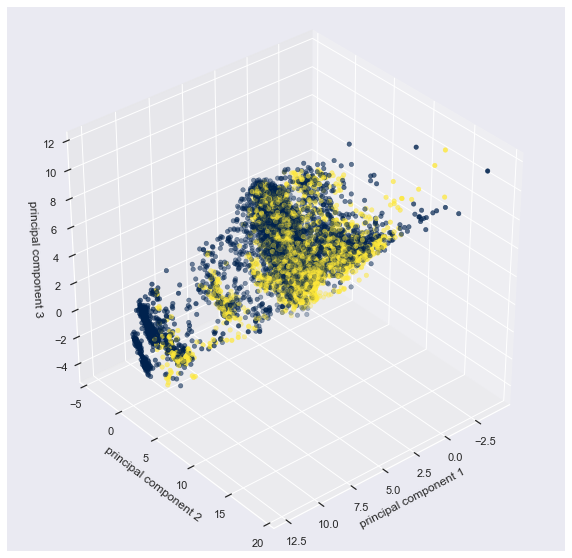

In [38]:
class_names = ['0 - Cliente não interessado','1 - Cliente interessado']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
markers = ['o', '*']

ax = plt.figure(figsize = (10,10))

ax = plt.axes(projection='3d')
ax.scatter(dataset_pc[all_componentes[0]], dataset_pc[all_componentes[1]], dataset_pc[all_componentes[2]], c=dataset_pc["y"],  cmap='cividis', linewidth=0.5);

ax.set_xlabel(all_componentes[0])
ax.set_ylabel(all_componentes[1])
ax.set_zlabel(all_componentes[2])

ax.view_init(35, 50)

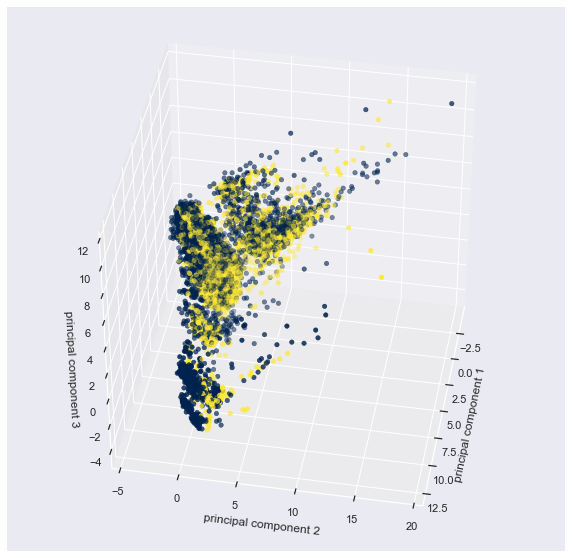

In [39]:
ax = plt.figure(figsize = (10,10))

ax = plt.axes(projection='3d')
ax.scatter(dataset_pc[all_componentes[0]], dataset_pc[all_componentes[1]], dataset_pc[all_componentes[2]], c=dataset_pc["y"],  cmap='cividis', linewidth=0.5);

ax.set_xlabel(all_componentes[0])
ax.set_ylabel(all_componentes[1])
ax.set_zlabel(all_componentes[2])

ax.view_init(40, 10)

C:\Users\UFOPA\.conda\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3040
           1       0.94      0.89      0.91      3054

    accuracy                           0.91      6094
   macro avg       0.92      0.91      0.91      6094
weighted avg       0.92      0.91      0.91      6094



<Figure size 432x288 with 0 Axes>

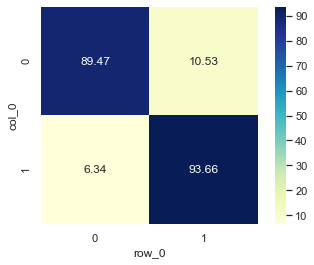

In [40]:
model = XGBClassifier(random_state = 123, n_estimators = 300)
model.fit(X_train_smote, Y_train_smote)

y_pred_smote = model.predict(X_test_smote)
print(classification_report(Y_test_smote, y_pred_smote))

contingency_matrix = pd.crosstab( Y_test_smote, y_pred_smote)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

plt.clf()
fig, ax = plt.subplots()
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1117
           1       0.74      0.55      0.63       296

    accuracy                           0.87      1413
   macro avg       0.82      0.75      0.77      1413
weighted avg       0.86      0.87      0.86      1413



<Figure size 432x288 with 0 Axes>

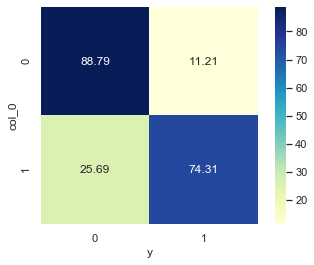

In [41]:
y_pred_val = model.predict(X_val)
print(classification_report(Y_val, y_pred_val))

contingency_matrix = pd.crosstab(Y_val, y_pred_val)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

plt.clf()
fig, ax = plt.subplots()
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

#### Outro caminho que também é usado para melhorar datasets desbalanceados que afetam diretamente na acurária do modelo, foi usar uma técnica que já esteja preparada para tal tarefa, utilizei a técnica `SVC (C-Support Vector Classification).`
- Nota-se que não é necessário passar pela etapa de geração de novos registros. 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1117
           1       0.74      0.55      0.63       296

    accuracy                           0.87      1413
   macro avg       0.82      0.75      0.77      1413
weighted avg       0.86      0.87      0.86      1413



<Figure size 432x288 with 0 Axes>

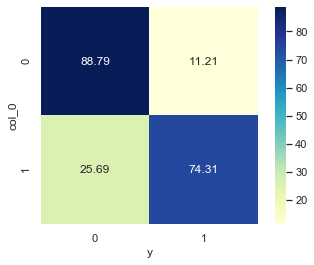

In [51]:
from sklearn.svm import SVC
#X_train, X_test, Y_train, Y_test = train_test_split(X_bruto_n3, y, random_state = 123, test_size = 0.2)
#X_train, X_test, Y_train, Y_test = train_test_split(X_pc, y, random_state = 123, test_size = 0.2)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_n1, y_real, random_state = 123, test_size = 0.2)
#X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, random_state = 123, test_size = 0.2)
#X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_n3, y, random_state = 123, test_size = 0.2)

svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, Y_train)

y_predict = svc_model.predict(X_test)

print(classification_report(Y_val, y_pred_val))

contingency_matrix = pd.crosstab(Y_val, y_pred_val)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

plt.clf()
fig, ax = plt.subplots()
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("cross_svc.png", bbox_inches='tight', dpi=100)
plt.show()

#### Considerações Finais:
- Após analíse das variáveis e dos primeiros resultados, já dislumbro os próximos passos para melhorar o desempenho do modelo e também da abordagem sobre o problema;
- Vejo que é possível não somente prever se um cliente é um potencial comprador do produto oferecido pela empresa, mas também buscar as condições mais prováveis para o mesmo mostrar-se interessado. Nessa segunda direção pretendo utilizar o algoritmo DBSCAN em combinação com técnica de aprendizagem por reforço.
- Para continuar a melhorar a acurácia do modelo de classificação é necessário testar novas ténicas e também fazer uso de `Hyperparameter Tuning` para nos ajudar nessa tarefa;

### <font color='red'>Obrigada pela oportunidade!</font>